# Buy Low, Sell High

Given a stock’s price history as a sequence, and assuming that you are only allowed to make one purchase and one sale, what is the maximum profit that can be obtained? For example, given prices = (20, 18, 14, 17, 20, 21, 15), the max profit would be 7, from buying at 14 and selling at 21.

In [ ]:
# finding the difference between each price and a running minimum /

def profit(prices):
    max_px = 0
    min_px = prices[0]
    for px in prices[1:]:
        min_px = min(min_px, px)
        max_px = max(px - min_px, max_px)
    return max_px

In [9]:
# input price

prices = (20, 18, 14, 17, 20, 21, 15)

In [10]:
# take execute profit from above input 

profit(prices)

7

There is a solution with n-squared time complexity that consists of taking every combination of two prices where the second price “comes after” the first and determining the maximum difference.

However, there is also an O(n) solution that consists of iterating through the sequence just once and finding the difference between each price and a running minimum. It goes something like this :

In [20]:
# build a quasi-realistic example

import numpy as np

In [21]:
# Create mostly NaN array with a few 'turning points' (local min/max).

prices = np.full(100, fill_value=np.nan)

In [22]:
# input value price

prices[[0, 25, 60, -1]] = [80., 30., 75., 50.]

In [23]:
# Linearly interpolate the missing values and add some noise.

x = np.arange(len(prices))

In [24]:
# generate substituting subinput 

is_valid = ~np.isnan(prices)

In [25]:
# create equation function for execute

prices = np.interp(x=x, xp=x[is_valid], fp=prices[is_valid])

In [26]:
# create price add function 

prices += np.random.randn(len(prices)) * 2

In [27]:
# create histirical graph with matplotlib

import matplotlib.pyplot as plt

In [28]:
# Warning! This isn't a fully correct solution, but it works for now.
# If the absolute min came after the absolute max, you'd have trouble.

mn = np.argmin(prices)

In [29]:
# create function

mx = mn + np.argmax(prices[mn:])

Text(0, 0.5, 'Price')

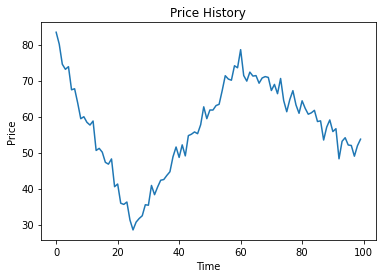

In [53]:
# create graph

fig, ax = plt.subplots()
ax.plot(prices)
ax.set_title('Price History')
ax.set_xlabel('Time')
ax.set_ylabel('Price')

Extending the logic from the pure-Python example, you can find the difference between each price and a running minimum (element-wise), and then take the max of this sequence

In [54]:
# create function cummin for execute

cummin = np.minimum.accumulate

In [55]:
# create equation 

def profit_with_numpy(prices):
    """Price minus cumulative minimum price, element-wise."""
    prices = np.asarray(prices)
    return np.max(prices - cummin(prices))


In [56]:
# show result from above function

profit_with_numpy(prices)

50.08796263633149

In [57]:
# execute from created function

np.allclose(profit_with_numpy(prices), profit(prices))

True